# Example of sampling of the models with discrete variables

In [1]:
%load_ext autoreload
%autoreload 2
import pymc4 as pm
import arviz as az

## Bernoulli

In [2]:
@pm.model
def bernoulli():
    var1 = yield pm.Bernoulli("var1", 0.2)
    var2 = yield pm.Bernoulli("var2", 0.5)
    var3 = yield pm.Bernoulli("var3", 0.8)

In [3]:
trace = pm.sample(bernoulli(), sampler_type="compound") 
# after the review default attribute should be compound and if there is no
# discrete variable in the model, we choose nuts as the sampler

Working with Compound step
 -- rwm[vars=['var1', 'var2', 'var3'], proposal_function=bernoulli_fn]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4de06f8a90>,
      dtype=object)

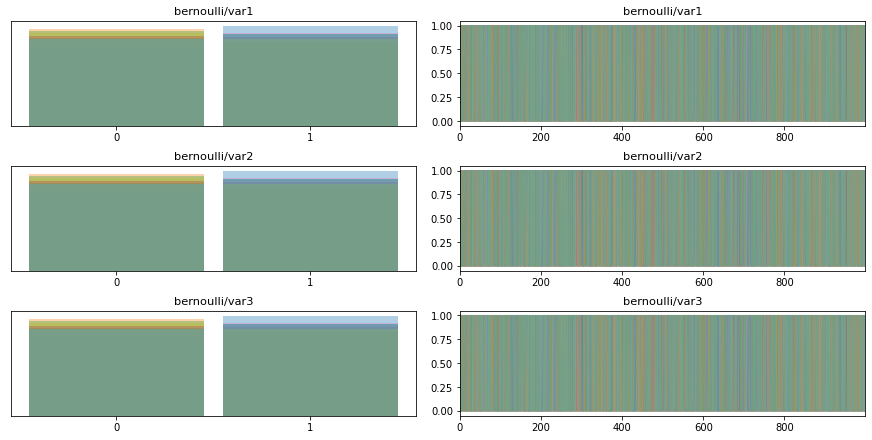

In [4]:
az.plot_trace(trace)

## Categorical

In [5]:
@pm.model
def categorical():
    var1 = yield pm.Categorical("var1", probs=[0.2, 0.4, 0.4])
    var1 = yield pm.Categorical("var2", probs=[0.1, 0.3, 0.2, 0.2, 0.2])
    var1 = yield pm.Categorical("var3", probs=[0.1, 0.1, 0.1, 0.1, 0.1, 0.5])

In [6]:
trace = pm.sample(categorical(), sampler_type="compound") 
# after the review default attribute should be compound and if there is no
# discrete variable in the model, we choose nuts as the sampler

Working with Compound step
 -- rwm[vars=['var1'], proposal_function=categorical_uniform_fn]
 -- rwm[vars=['var2'], proposal_function=categorical_uniform_fn]
 -- rwm[vars=['var3'], proposal_function=categorical_uniform_fn]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4db829f6a0>,
      dtype=object)

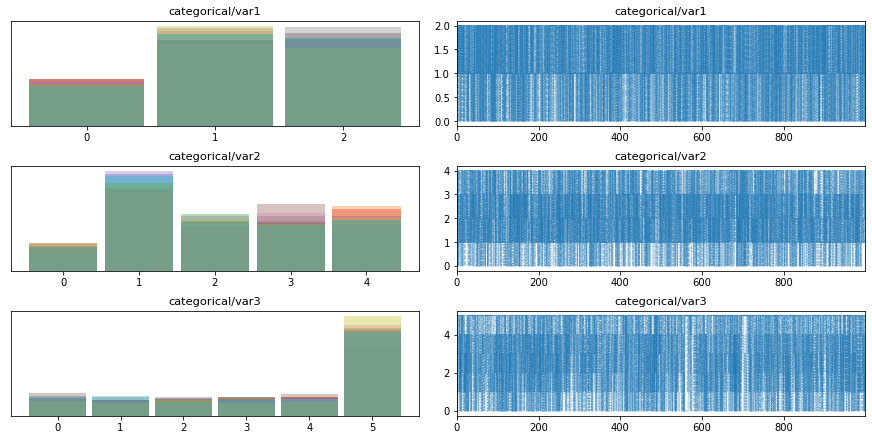

In [8]:
az.plot_trace(trace, compact=True)

## Poisson

In [9]:
from pymc4.distributions.state_functions import gaussian_round_fn
from pymc4.mcmc.samplers import RandomWalkM
import functools

@pm.model
def model():
    var1 = yield pm.Poisson("var1", 4) # gaussian with round dist proposal
    var2 = yield pm.Poisson("var3", 4) # continous space

In [10]:
trace = pm.sample(model(), 
                  sampler_type="compound", 
                  sampler_methods=[
                      ("var1", RandomWalkM, {"new_state_fn": gaussian_round_fn()}),
                  ],
                  trace_discrete=["var1"])

Working with Compound step
 -- rwm[vars=['var1'], proposal_function=gaussian_round_fn]
 -- nuts[vars=['var3'], proposal_function=default]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d984d18d0>,
      dtype=object)

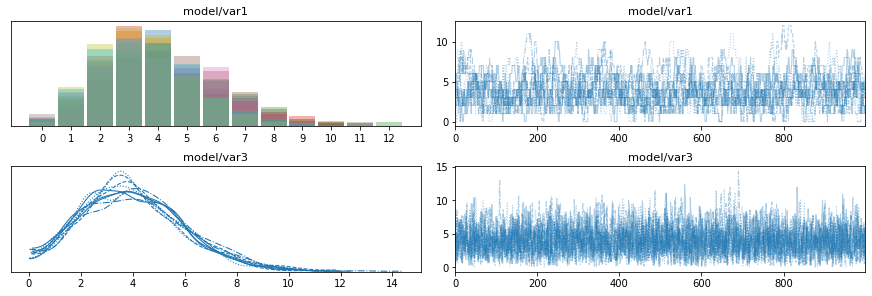

In [11]:
az.plot_trace(trace, compact=True)